In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [20]:
df=pd.read_csv('cars-uci.csv',delimiter=';')
#eliminando linhas com missings
df=df.dropna()

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


In [5]:
#definindo as dimensões do para clustering
mpg=np.array(df['mpg'])
hp=np.array(df['horsepower'])
w=np.array(df['weight'])

In [6]:
#simples verificação
hp[0]

130.0

Standardization das features

In [7]:
mpgm,mpgdp=mpg.mean(),mpg.std()

In [8]:
hpm,hpdp=hp.mean(),hp.std()

In [9]:
wm,wdp=df['weight'].mean(),df['weight'].std()

In [11]:
XS=np.zeros((len(mpg),3))

In [12]:
XS[:,0]=(mpg-mpgm)/mpgdp
XS[:,1]=(hp-hpm)/hpdp
XS[:,2]=(w-wm)/wdp

In [17]:
custos=[]
for i in range(2,9):
  km=KMeans(i)
  km.fit(XS)
  custos.append(km.inertia_)


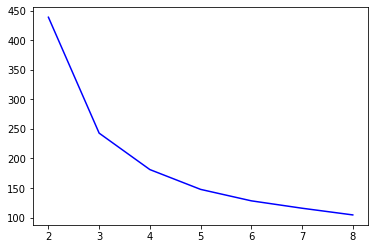

In [18]:
plt.plot([i for i in range(2,9)],custos,color='blue')
plt.show()

In [19]:
 km=KMeans(3)
 km.fit(XS)
 km.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,

In [22]:
df['cluster']=km.labels_

In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cluster
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,0
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,1
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,1
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,1
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,1


In [24]:
df[df['cluster']==0].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cluster
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,0
20,24.0,4,1130,95.0,2372,150,70,3,toyota corona mark ii,0
21,22.0,6,1980,95.0,2833,155,70,1,plymouth duster,0
22,18.0,6,1990,97.0,2774,155,70,1,amc hornet,0
23,21.0,6,2000,85.0,2587,160,70,1,ford maverick,0
26,25.0,4,1100,87.0,2672,175,70,2,peugeot 504,0
27,24.0,4,1070,90.0,2430,145,70,2,audi 100 ls,0
28,25.0,4,1040,95.0,2375,175,70,2,saab 99e,0
29,26.0,4,1210,113.0,2234,125,70,2,bmw 2002,0
30,21.0,6,1990,90.0,2648,150,70,1,amc gremlin,0


In [25]:
df[df['cluster']==1].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cluster
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,1
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,1
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,1
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,1
5,15.0,8,4290,198.0,4341,100,70,1,ford galaxie 500,1
6,14.0,8,4540,220.0,4354,90,70,1,chevrolet impala,1
7,14.0,8,4400,215.0,4312,85,70,1,plymouth fury iii,1
8,14.0,8,4550,225.0,4425,100,70,1,pontiac catalina,1
9,15.0,8,3900,190.0,3850,85,70,1,amc ambassador dpl,1
15,15.0,8,3830,170.0,3563,100,70,1,dodge challenger se,1


In [26]:
df[df['cluster']==2].head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cluster
24,27.0,4,9700,88.0,2130,145,70,3,datsun pl510,2
25,26.0,4,9700,46.0,1835,205,70,2,volkswagen 1131 deluxe sedan,2
35,27.0,4,9700,88.0,2130,145,71,3,datsun pl510,2
36,28.0,4,1400,90.0,2264,155,71,1,chevrolet vega 2300,2
57,28.0,4,1160,90.0,2123,140,71,2,opel 1900,2
58,30.0,4,7900,70.0,2074,195,71,2,peugeot 304,2
59,30.0,4,8800,76.0,2065,145,71,2,fiat 124b,2
60,31.0,4,7100,65.0,1773,190,71,3,toyota corolla 1200,2
61,35.0,4,7200,69.0,1613,180,71,3,datsun 1200,2
62,27.0,4,9700,60.0,1834,190,71,2,volkswagen model 111,2
